In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(124)

In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Hyper-parameters
input_size = 784 # 28x28
#n_epo = 100
batch_size = 64


# Load the dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
new_train_dataset = torch.tensor(np.random.randint(0, 10, (len(train_dataset)),))
train_dataset.targets = new_train_dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
## Model 1
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
def train_mod(model, optimizer, train_loader):
    model.train()
    correct = 0
    train_loss = 0
    counter = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        counter += 1
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()


        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        predicted = np.argmax(output.data, axis=1)
        correct += np.equal(predicted, target.data).sum()

    train_loss = (train_loss * 100) / len(train_loader.dataset) #(train_loss ) / len(train_loader)
    accuracy = 100.0 * correct / len(train_loader)
    return train_loss, accuracy

In [ ]:
def test_mod(model, epoch, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)

        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.data

        predicted = np.argmax(output.data, axis = 1)
        correct = correct + np.equal(predicted, target.data).sum()


    test_loss =  (test_loss * 100) / len(test_loader.dataset) #(test_loss ) / len(test_loader)
    return test_loss

In [ ]:
model = Model1()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)
train_loss_mod1 = []
test_loss_mod1 = []

n_epo = 100
criterion = torch.nn.CrossEntropyLoss()
for epoch in range(1, n_epo + 1):
    train_losses, acc = train_mod(model, optimizer, train_loader)
    train_loss_mod1.append(train_losses)
    test_losses = test_mod(model, epoch, test_loader)
    test_loss_mod1.append(test_losses)
    print(f"Epoch {epoch}, Train Loss: {train_losses:.4f} , Test Loss: {test_losses:.4f}")

Epoch 1, Train Loss: 3.6018 , Test Loss: 3.6141
Epoch 2, Train Loss: 3.6001 , Test Loss: 3.6095
Epoch 3, Train Loss: 3.5994 , Test Loss: 3.6134
Epoch 4, Train Loss: 3.5989 , Test Loss: 3.6144
Epoch 5, Train Loss: 3.5984 , Test Loss: 3.6167
Epoch 6, Train Loss: 3.5980 , Test Loss: 3.6174
Epoch 7, Train Loss: 3.5973 , Test Loss: 3.6122
Epoch 8, Train Loss: 3.5967 , Test Loss: 3.6167
Epoch 9, Train Loss: 3.5959 , Test Loss: 3.6144
Epoch 10, Train Loss: 3.5952 , Test Loss: 3.6033
Epoch 11, Train Loss: 3.5946 , Test Loss: 3.6124
Epoch 12, Train Loss: 3.5939 , Test Loss: 3.6196
Epoch 13, Train Loss: 3.5933 , Test Loss: 3.6191
Epoch 14, Train Loss: 3.5924 , Test Loss: 3.6194
Epoch 15, Train Loss: 3.5911 , Test Loss: 3.6135
Epoch 16, Train Loss: 3.5903 , Test Loss: 3.6196
Epoch 17, Train Loss: 3.5896 , Test Loss: 3.6220
Epoch 18, Train Loss: 3.5885 , Test Loss: 3.6298
Epoch 19, Train Loss: 3.5870 , Test Loss: 3.6278
Epoch 20, Train Loss: 3.5869 , Test Loss: 3.6256
Epoch 21, Train Loss: 3.5854 

In [ ]:
test_losses

tensor(0.1376)

In [ ]:
train = []
for i in train_loss_mod1:
    train.append(i.data.numpy().tolist())
test = []
for i in test_loss_mod1:
    test.append(i.data.numpy().tolist())

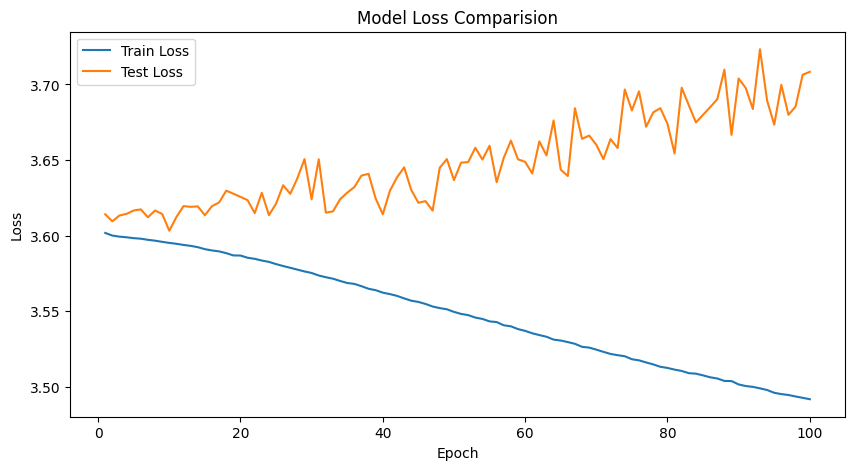

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, 101, 1), train)
plt.plot(np.arange(1, 101, 1), test)
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()